# Pandas DataFrame
This notebook illustrates how to conduct data analysis using DataFrame.  The contents are discussed in the following order:

- Data Preparation: DataFrame creation, indexing, and data transformation. 
- Data Wrangling: Useful methods, tidy data, groupby, and groupby object.
- Data Visualizations with DataFrame: Plotting with Pandas, customization, DataFrame plot idioms, and PDF/CDF

In each section, appropriate datasets are used to demonstrate the functionalities and outputs.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preparation
### DataFrame Creation

In [2]:
# Create DataFrame from list and dictionary
index = ['A','B','C','D']
col1 = [10,20,30,40]
col2 = [1.0,0.9,0.8,0.7]
col3 = ['a','b','c','d']
col4 = [12.3, 45.6, 78.9, 123.4]

list_lables = ['index', 'col1', 'col2', 'col3', 'col4']
list_cols = [index, col1, col2, col3, col4]
zipped = list(zip(list_lables, list_cols))
zipped

[('index', ['A', 'B', 'C', 'D']),
 ('col1', [10, 20, 30, 40]),
 ('col2', [1.0, 0.9, 0.8, 0.7]),
 ('col3', ['a', 'b', 'c', 'd']),
 ('col4', [12.3, 45.6, 78.9, 123.4])]

In [3]:
my_dict = dict(zipped)
my_dict

{'col1': [10, 20, 30, 40],
 'col2': [1.0, 0.9, 0.8, 0.7],
 'col3': ['a', 'b', 'c', 'd'],
 'col4': [12.3, 45.6, 78.9, 123.4],
 'index': ['A', 'B', 'C', 'D']}

In [4]:
df = pd.DataFrame(my_dict)
df

,col1,col2,col3,col4,index
0,10,1.0,a,12.3,A
1,20,0.9,b,45.6,B
2,30,0.8,c,78.9,C
3,40,0.7,d,123.4,D


#### Converting data types

In [5]:
# Convert to string
df['col1_str'] = df['col1'].astype(str)
df.col1_str # object = string

0    10
1    20
2    30
3    40
Name: col1_str, dtype: object

In [6]:
# Convert to numeric
df['col4'] = pd.to_numeric(df['col1_str'], errors = 'coerce')
df.col4

0    10
1    20
2    30
3    40
Name: col4, dtype: int64

In [7]:
# Convert categorical data to 'category' dtype:
df['col3'] = df['col3'].astype('category')
df.col3

0    a
1    b
2    c
3    d
Name: col3, dtype: category
Categories (4, object): [a, b, c, d]

#### Create index

In [8]:
# Method 1
df1 = df.copy()
df1.index = df1['index']
del df1['index']
df1

,col1,col2,col3,col4,col1_str
index,,,,,
A,10,1.0,a,10,10
B,20,0.9,b,20,20
C,30,0.8,c,30,30
D,40,0.7,d,40,40


In [9]:
# Method 2
df2 = df.set_index(['index'])
df2

,col1,col2,col3,col4,col1_str
index,,,,,
A,10,1.0,a,10,10
B,20,0.9,b,20,20
C,30,0.8,c,30,30
D,40,0.7,d,40,40


In [10]:
df = df.set_index(['index'])

#### Create new columns from other columns

In [11]:
df['total'] = df.sum(axis = 'columns')
df

,col1,col2,col3,col4,col1_str,total
index,,,,,,
A,10,1.0,a,10,10,21.0
B,20,0.9,b,20,20,40.9
C,30,0.8,c,30,30,60.8
D,40,0.7,d,40,40,80.7


### Indexing
#### Column and row access

In [12]:
# Column Access - []: Returns Series
df['col1']

index
A    10
B    20
C    30
D    40
Name: col1, dtype: int64

In [13]:
# Column Access - [[]]: Returns DataFrame
df[['col1']]

,col1
index,
A,10
B,20
C,30
D,40


In [14]:
# Row Access - []
df[0:2]

,col1,col2,col3,col4,col1_str,total
index,,,,,,
A,10,1.0,a,10,10,21.0
B,20,0.9,b,20,20,40.9


In [15]:
# Row Access - loc
df.loc["A":"C"]

,col1,col2,col3,col4,col1_str,total
index,,,,,,
A,10,1.0,a,10,10,21.0
B,20,0.9,b,20,20,40.9
C,30,0.8,c,30,30,60.8


In [16]:
# loc
df.loc[:, ["col1", "col4"]]

,col1,col4
index,,
A,10,10
B,20,20
C,30,30
D,40,40


In [17]:
# iloc:
df.iloc[:2, [1,3]]

,col2,col4
index,,
A,1.0,10
B,0.9,20


In [18]:
# idxmax() and idxmin()
df.loc[:, df.dtypes == 'int64'].idxmax()

col1    D
col4    D
dtype: object

#### Reindex

In [19]:
reverse_order = ['D', 'C', 'B', 'A']
df_rev = df.reindex(reverse_order)
df_rev

,col1,col2,col3,col4,col1_str,total
index,,,,,,
D,40,0.7,d,40,40,80.7
C,30,0.8,c,30,30,60.8
B,20,0.9,b,20,20,40.9
A,10,1.0,a,10,10,21.0


In [20]:
# Reindex from a DataFrame Index
df_rev.reindex(df.index)

,col1,col2,col3,col4,col1_str,total
index,,,,,,
A,10,1.0,a,10,10,21.0
B,20,0.9,b,20,20,40.9
C,30,0.8,c,30,30,60.8
D,40,0.7,d,40,40,80.7


#### sort index

In [21]:
df['D':'A':-1]

,col1,col2,col3,col4,col1_str,total
index,,,,,,
D,40,0.7,d,40,40,80.7
C,30,0.8,c,30,30,60.8
B,20,0.9,b,20,20,40.9
A,10,1.0,a,10,10,21.0


In [22]:
df_rev.sort_index()

,col1,col2,col3,col4,col1_str,total
index,,,,,,
A,10,1.0,a,10,10,21.0
B,20,0.9,b,20,20,40.9
C,30,0.8,c,30,30,60.8
D,40,0.7,d,40,40,80.7


#### Loop using iterrows()

In [23]:
for row, info in df.iterrows():
    print(row)
    print(info)
    print('=====')

A
col1        10
col2         1
col3         a
col4        10
col1_str    10
total       21
Name: A, dtype: object
=====
B
col1          20
col2         0.9
col3           b
col4          20
col1_str      20
total       40.9
Name: B, dtype: object
=====
C
col1          30
col2         0.8
col3           c
col4          30
col1_str      30
total       60.8
Name: C, dtype: object
=====
D
col1          40
col2         0.7
col3           d
col4          40
col1_str      40
total       80.7
Name: D, dtype: object
=====


When using iloc, you don’t need double “[“ to select all, unless you specify certain rows.

#### Slice rows in reverse order

In [24]:
df['D':'A':-1]

,col1,col2,col3,col4,col1_str,total
index,,,,,,
D,40,0.7,d,40,40,80.7
C,30,0.8,c,30,30,60.8
B,20,0.9,b,20,20,40.9
A,10,1.0,a,10,10,21.0


### Data Transformation
#### Transform DataFrame to Numpy

In [25]:
df.col1.head()

index
A    10
B    20
C    30
D    40
Name: col1, dtype: int64

In [26]:
# use .values to get numpy array
df.col1.values

array([10, 20, 30, 40], dtype=int64)

#### Vectorized methods

When performance is paramount, you should avoid using .apply() and .map() because those constructs perform Python for-loops over the data stored in a pandas Series or DataFrame. By using vectorized functions instead, you can loop over the data at the same speed as compiled code (C, Fortran, etc.)! NumPy, SciPy and pandas come with a variety of vectorized functions (called Universal Functions or UFuncs in NumPy).

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, A to D
Data columns (total 6 columns):
col1        4 non-null int64
col2        4 non-null float64
col3        4 non-null category
col4        4 non-null int64
col1_str    4 non-null object
total       4 non-null float64
dtypes: category(1), float64(2), int64(2), object(1)
memory usage: 548.0+ bytes


In [28]:
# select columns in numeric data types
# then, convert to dozen units
df.select_dtypes(include=['float64', 'int64']).floordiv(12)

,col1,col2,col4,total
index,,,,
A,0,0.0,0,1.0
B,1,0.0,1,3.0
C,2,0.0,2,5.0
D,3,0.0,3,6.0


In [29]:
# the same as:
df.select_dtypes(include=['float64', 'int64']).apply(lambda x: x//12)

,col1,col2,col4,total
index,,,,
A,0,0.0,0,1.0
B,1,0.0,1,3.0
C,2,0.0,2,5.0
D,3,0.0,3,6.0


#### map()

In [30]:
# apply functions on index
df.index.map(str.lower)

Index(['a', 'b', 'c', 'd'], dtype='object', name='index')

In [31]:
# apply functions on columns
mapping = {'a':'item a', 'b':'item b', 'c':'item c', 'd':'item d'}
df['item'] = df['col3'].map(mapping)
df

,col1,col2,col3,col4,col1_str,total,item
index,,,,,,,
A,10,1.0,a,10,10,21.0,item a
B,20,0.9,b,20,20,40.9,item b
C,30,0.8,c,30,30,60.8,item c
D,40,0.7,d,40,40,80.7,item d


#### categorical data

Advantages using dtype of category: less memory and faster operation like groupby()

In [32]:
df['item'].unique()

array(['item a', 'item b', 'item c', 'item d'], dtype=object)

In [33]:
df['item_category'] = df['item'].astype('category')

In [34]:
# Ordered category
df['item_ordered'] = pd.Categorical(values=df.item, 
                                    categories=['item a', 'item b', 'item c', 'item d'],
                                    ordered = True)

In [35]:
df.item_ordered

index
A    item a
B    item b
C    item c
D    item d
Name: item_ordered, dtype: category
Categories (4, object): [item a < item b < item c < item d]

#### String Methods

In [36]:
df.item.str.contains('a')

index
A     True
B    False
C    False
D    False
Name: item, dtype: bool

In [37]:
~df.item.str.contains('a')

index
A    False
B     True
C     True
D     True
Name: item, dtype: bool

In [38]:
df.item.str.upper()

index
A    ITEM A
B    ITEM B
C    ITEM C
D    ITEM D
Name: item, dtype: object

In [39]:
df.item.str.lower()

index
A    item a
B    item b
C    item c
D    item d
Name: item, dtype: object

**Anonymouus functions**

In [40]:
df.col1.map(lambda num: num ** 2)

index
A     100
B     400
C     900
D    1600
Name: col1, dtype: int64

#### Check Data Quality with Asserts
- Programmatically vs visually checking
- If we drop or fill NaNs, we expect 0 missing values
- We can write an assert statement to verify this
- We can detect early warnings and errors
- This gives us confidence that our code is running correctly

In [41]:
# syntax
assert 1 == 1

In [42]:
# Create example DataFrame
df2 = pd.DataFrame({
    'col1': [4.5, 5.5, np.nan, 3.5, np.nan],
    'col2': [np.nan, 10, np.nan, 5, 15],
    'col3': [1, 2, 3, np.nan, 5],
    'col4': ['A', 'B', np.nan, 'C', 'D'],
    'col5': [100, 200, 300, np.nan, 500]
})
df2

,col1,col2,col3,col4,col5
0,4.5,NaN,1.0,A,100.0
1,5.5,10.0,2.0,B,200.0
2,NaN,NaN,3.0,NaN,300.0
3,3.5,5.0,NaN,C,NaN
4,NaN,15.0,5.0,D,500.0


In [43]:
# Use assert to check whethere there's null value
try:
    assert df2.col4.notnull().all()
except:
    print('AssertionError')

AssertionError


In [44]:
df2_clean = df2.fillna(value = 0)
assert df2_clean.col4.notnull().all()

In [45]:
# Use assert to test if col1 is of type float64
assert df2_clean.col1.dtypes == np.float64

In [46]:
# Use assert to test if col2 is of type int32
df2_clean.col2 = df2_clean.col2.astype('int')
assert df2_clean.col2.dtype == np.int32

In [47]:
# Use assert to test if col4 is of type object
assert df2.col4.dtypes == np.object

## Data Wrangling
Data source of indicators.csv: https://www.kaggle.com/worldbank/world-development-indicators#Indicators.csv

In [48]:
## import indicators.csv
df_indicator = pd.read_csv('C:\\Users\\byron\\Desktop\\data\\Indicators.csv', 
                 nrows = 100000)

### Useful Methods

In [49]:
## Transform each indicator into a column and each row as an year
df_indicator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
CountryName      100000 non-null object
CountryCode      100000 non-null object
IndicatorName    100000 non-null object
IndicatorCode    100000 non-null object
Year             100000 non-null int64
Value            100000 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 4.6+ MB


In [50]:
df_indicator.shape

(100000, 6)

In [51]:
df_indicator.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [52]:
# Frequency count & Sort by values acendingly
df_indicator[0:1000].CountryName.value_counts(dropna = False).sort_values(ascending = True)

Heavily indebted poor countries (HIPC)        18
Central Europe and the Baltics                71
Fragile and conflict affected situations      76
Caribbean small states                        77
Arab World                                    80
Europe & Central Asia (developing only)       89
Europe & Central Asia (all income levels)    109
European Union                               116
Euro area                                    119
East Asia & Pacific (all income levels)      122
East Asia & Pacific (developing only)        123
Name: CountryName, dtype: int64

In [53]:
# Sort by index
df_indicator[0:1000].CountryName.value_counts(dropna = False).sort_index()

Arab World                                    80
Caribbean small states                        77
Central Europe and the Baltics                71
East Asia & Pacific (all income levels)      122
East Asia & Pacific (developing only)        123
Euro area                                    119
Europe & Central Asia (all income levels)    109
Europe & Central Asia (developing only)       89
European Union                               116
Fragile and conflict affected situations      76
Heavily indebted poor countries (HIPC)        18
Name: CountryName, dtype: int64

In [54]:
# Summary Statistics
df_indicator.describe()

,Year,Value
count,100000.000000,1.000000e+05
mean,1961.487630,3.065939e+11
std,1.071792,8.128179e+12
min,1960.000000,-1.181558e+14
25%,1961.000000,6.469137e+00
50%,1962.000000,6.728000e+01
75%,1962.000000,5.650574e+06
max,1963.000000,5.037593e+14


In [55]:
df_indicator.Value[df_indicator.IndicatorCode == 'SP.ADO.TFRT'].describe()

count    851.000000
mean     100.522860
std       54.592668
min        3.801000
25%       49.073800
50%      101.237486
75%      142.621200
max      235.320000
Name: Value, dtype: float64

### Tidy Data
- "Tidy Data" Paper by Hadley Wickham, PhD
- Columns represent separate variables
- Rows represent individual observations
- Observational units form tables

#### Pivot

In [56]:
df_indicator.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [57]:
df_pivot = pd.pivot_table(df_indicator, 
               values = ['Value'], 
               index = ['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode'],
               columns = ['Year'])
df_pivot.head()

Value  \
Year                                                                                             1960   
CountryName CountryCode IndicatorName                                      IndicatorCode                
Afghanistan AFG         Adolescent fertility rate (births per 1,000 wom... SP.ADO.TFRT     145.321000   
                        Age dependency ratio (% of working-age population) SP.POP.DPND      81.717726   
                        Age dependency ratio, old (% of working-age pop... SP.POP.DPND.OL    5.086254   
                        Age dependency ratio, young (% of working-age p... SP.POP.DPND.YG   76.631472   
                        Agricultural land (% of land area)                 AG.LND.AGRI.ZS         NaN   

                                                                                                       \
Year                                                                                             1961   
CountryName CountryCode IndicatorName                                      IndicatorCode                
Afghanistan AFG         Adolescent fertility rate (births per 1,000 wom... SP.ADO.TFRT     145.321000   
                        Age dependency ratio (% of working-age population) SP.POP.DPND      82.755896   
                        Age dependency ratio, old (% of working-age pop... SP.POP.DPND.OL    5.132610   
                        Age dependency ratio, young (% of working-age p... SP.POP.DPND.YG   77.623286   
                        Agricultural land (% of land area)                 AG.LND.AGRI.ZS   57.745918   

                                                                                                       \
Year                                                                                             1962   
CountryName CountryCode IndicatorName                                      IndicatorCode                
Afghanistan AFG         Adolescent fertility rate (births per 1,000 wom... SP.ADO.TFRT     145.321000   
                        Age dependency ratio (% of working-age population) SP.POP.DPND      83.304557   
                        Age dependency ratio, old (% of working-age pop... SP.POP.DPND.OL    5.139519   
                        Age dependency ratio, young (% of working-age p... SP.POP.DPND.YG   78.165038   
                        Agricultural land (% of land area)                 AG.LND.AGRI.ZS   57.837821   

                                                                                                       
Year                                                                                             1963  
CountryName CountryCode IndicatorName                                      IndicatorCode               
Afghanistan AFG         Adolescent fertility rate (births per 1,000 wom... SP.ADO.TFRT     145.321000  
                        Age dependency ratio (% of working-age population) SP.POP.DPND      83.550740  
                        Age dependency ratio, old (% of working-age pop... SP.POP.DPND.OL    5.111892  
                        Age dependency ratio, young (% of working-age p... SP.POP.DPND.YG   78.438848  
                        Agricultural land (% of land area)                 AG.LND.AGRI.ZS   57.914407

#### Flatten multi-index in columns

In [58]:
df_pivot.columns = df_pivot.columns.get_level_values(1)
df_pivot.head()

Year                                                                                             1960  \
CountryName CountryCode IndicatorName                                      IndicatorCode                
Afghanistan AFG         Adolescent fertility rate (births per 1,000 wom... SP.ADO.TFRT     145.321000   
                        Age dependency ratio (% of working-age population) SP.POP.DPND      81.717726   
                        Age dependency ratio, old (% of working-age pop... SP.POP.DPND.OL    5.086254   
                        Age dependency ratio, young (% of working-age p... SP.POP.DPND.YG   76.631472   
                        Agricultural land (% of land area)                 AG.LND.AGRI.ZS         NaN   

Year                                                                                             1961  \
CountryName CountryCode IndicatorName                                      IndicatorCode                
Afghanistan AFG         Adolescent fertility rate (births per 1,000 wom... SP.ADO.TFRT     145.321000   
                        Age dependency ratio (% of working-age population) SP.POP.DPND      82.755896   
                        Age dependency ratio, old (% of working-age pop... SP.POP.DPND.OL    5.132610   
                        Age dependency ratio, young (% of working-age p... SP.POP.DPND.YG   77.623286   
                        Agricultural land (% of land area)                 AG.LND.AGRI.ZS   57.745918   

Year                                                                                             1962  \
CountryName CountryCode IndicatorName                                      IndicatorCode                
Afghanistan AFG         Adolescent fertility rate (births per 1,000 wom... SP.ADO.TFRT     145.321000   
                        Age dependency ratio (% of working-age population) SP.POP.DPND      83.304557   
                        Age dependency ratio, old (% of working-age pop... SP.POP.DPND.OL    5.139519   
                        Age dependency ratio, young (% of working-age p... SP.POP.DPND.YG   78.165038   
                        Agricultural land (% of land area)                 AG.LND.AGRI.ZS   57.837821   

Year                                                                                             1963  
CountryName CountryCode IndicatorName                                      IndicatorCode               
Afghanistan AFG         Adolescent fertility rate (births per 1,000 wom... SP.ADO.TFRT     145.321000  
                        Age dependency ratio (% of working-age population) SP.POP.DPND      83.550740  
                        Age dependency ratio, old (% of working-age pop... SP.POP.DPND.OL    5.111892  
                        Age dependency ratio, young (% of working-age p... SP.POP.DPND.YG   78.438848  
                        Agricultural land (% of land area)                 AG.LND.AGRI.ZS   57.914407

#### Reset multi-layer indexes to columns

In [59]:
df_pivot = df_pivot.reset_index()
df_pivot.head()

Year,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963
0,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,145.321000,145.321000,145.321000,145.321000
1,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,81.717726,82.755896,83.304557,83.550740
2,Afghanistan,AFG,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,5.086254,5.132610,5.139519,5.111892
3,Afghanistan,AFG,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,76.631472,77.623286,78.165038,78.438848
4,Afghanistan,AFG,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,57.745918,57.837821,57.914407


#### Trandform df_pivot back to tidy structure

In [60]:
df_melt = df_pivot.melt(id_vars=['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode'], 
                        value_vars=[1960, 1961, 1962, 1963],
                        var_name='Year', value_name='Value')
df_melt[(df_melt.CountryName == 'Arab World') & (df_melt.Value.notnull())].head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
646,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
647,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
648,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
649,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
656,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


### Groupby

In [61]:
df_diamonds = sns.load_dataset('diamonds')
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [62]:
df_diamonds.groupby('cut').mean()

,carat,depth,table,price,x,y,z
cut,,,,,,,
Fair,1.046137,64.041677,59.053789,4358.757764,6.246894,6.182652,3.982770
Good,0.849185,62.365879,58.694639,3928.864452,5.838785,5.850744,3.639507
Ideal,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448
Premium,0.891955,61.264673,58.746095,4584.257704,5.973887,5.944879,3.647124
Very Good,0.806381,61.818275,57.956150,3981.759891,5.740696,5.770026,3.559801


In [63]:
# multiple aggregation
df_diamonds.groupby(['cut'])[['carat', 'price']].agg(['mean', 'count'])

carat               price       
               mean  count         mean  count
cut                                           
Fair       1.046137   1610  4358.757764   1610
Good       0.849185   4906  3928.864452   4906
Ideal      0.702837  21551  3457.541970  21551
Premium    0.891955  13791  4584.257704  13791
Very Good  0.806381  12082  3981.759891  12082

In [64]:
# custom aggregation
def data_range(series):
    return series.max() - series.min()

In [65]:
df_diamonds.groupby(['cut'])[['carat', 'price']].agg(data_range)

,carat,price
cut,,
Fair,4.79,18237
Good,2.78,18461
Ideal,3.30,18480
Premium,3.81,18497
Very Good,3.80,18482


In [66]:
# Custom aggregation: dictionaries
df_diamonds.groupby(['cut'])[['carat', 'price']].agg(
    {'carat': data_range, 'price': 'mean'})

,price,carat
cut,,
Fair,4358.757764,4.79
Good,3928.864452,2.78
Ideal,3457.541970,3.30
Premium,4584.257704,3.81
Very Good,3981.759891,3.80


#### Filling missing data (imputation) by group - transform()
Data source of titanic dataset: biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls

In [67]:
## import titanic.csv
df_titanic = pd.read_csv('C:\\Users\\byron\\Documents\\GitHub\\python-coding\\data\\titanic3.csv')

In [68]:
df_titanic.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1300,3.0,1.0,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1.0,0.0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3.0,0.0,"Youseff, Mr. Gerious",male,45.5,0.0,0.0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3.0,0.0,"Yousif, Mr. Wazli",male,NaN,0.0,0.0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3.0,0.0,"Yousseff, Mr. Gerious",male,NaN,0.0,0.0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df_titanic = df_titanic.drop(1309, axis = 0)
df_titanic[['age']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 1 columns):
age    1046 non-null float64
dtypes: float64(1)
memory usage: 20.5 KB


To fill in missing 'age' values for paseengers on Titanic with median age from their 'gender' and 'pclass'.

In [70]:
def impute_median(series):
    return series.fillna(series.median())

In [71]:
by_sex_class = df_titanic.groupby(['sex', 'pclass'])
df_titanic.age = by_sex_class['age'].transform(impute_median)

In [72]:
df_titanic[['pclass', 'sex', 'age']].tail(10)

,pclass,sex,age
1299,3.0,male,27.0
1300,3.0,female,15.0
1301,3.0,male,45.5
1302,3.0,male,25.0
1303,3.0,male,25.0
1304,3.0,female,14.5
1305,3.0,female,22.0
1306,3.0,male,26.5
1307,3.0,male,27.0
1308,3.0,male,29.0


### Groupby Object
A groupby object is a dictionary. The value is all rows in the subgroup.

In [73]:
type(by_sex_class)

pandas.core.groupby.DataFrameGroupBy

In [74]:
type(by_sex_class.groups)

dict

In [75]:
print(by_sex_class.groups.keys())

dict_keys([('male', 2.0), ('male', 3.0), ('female', 1.0), ('female', 2.0), ('female', 3.0), ('male', 1.0)])


In [76]:
# groupby object: iteration
for group_name, group in by_sex_class:
    avg = group['age'].mean()
    print(group_name, avg)

('female', 1.0) 36.9583333333
('female', 2.0) 27.5133650943
('female', 3.0) 22.1304013889
('male', 1.0) 41.1810988827
('male', 2.0) 30.7153994152
('male', 3.0) 25.6812034483


In [77]:
# groupby object: iteration and filtering
for group_name, group in by_sex_class:
    avg = group.loc[group['survived'] == 1, 'age'].mean()
    print(group_name, avg)

('female', 1.0) 37.0215827338
('female', 2.0) 26.7384755319
('female', 3.0) 21.1949688679
('male', 1.0) 36.9330606557
('male', 2.0) 18.413332
('male', 3.0) 22.9833333333


In [78]:
# groupby object: comprehension
survived_age_mean = {group_name: group.loc[group['survived']== 1, 'age'].mean()
                     for group_name, group in by_sex_class}

In [79]:
pd.Series(survived_age_mean)

female  1.0    37.021583
        2.0    26.738476
        3.0    21.194969
male    1.0    36.933061
        2.0    18.413332
        3.0    22.983333
dtype: float64

#### use Boolean Series in groupby

In [80]:
# Create a Boolean Series: under10
under10 = (df_titanic['age'] < 10).map({True: 'under 10', False: 'over 10'})
# Group by under10 and compute survival rate
survival_rate_1 = df_titanic.groupby(under10)['survived'].mean()
print(survival_rate_1)

age
over 10     0.366748
under 10    0.609756
Name: survived, dtype: float64


In [81]:
survival_rate_2 = df_titanic.groupby([under10, 'pclass'])['survived'].mean()
print(survival_rate_2)

age       pclass
over 10   1.0       0.617555
          2.0       0.380392
          3.0       0.238897
under 10  1.0       0.750000
          2.0       1.000000
          3.0       0.446429
Name: survived, dtype: float64


#### Grouping and filtering with .filter()
Use groupby with the .filter() method to remove whole groups of rows from a DataFrame based on a boolean ocndition.

In [82]:
survival_rate_by_sex_class = by_sex_class['survived'].mean()
print(survival_rate_by_sex_class)

sex     pclass
female  1.0       0.965278
        2.0       0.886792
        3.0       0.490741
male    1.0       0.340782
        2.0       0.146199
        3.0       0.152130
Name: survived, dtype: float64


In [83]:
# Filter df_titanic to get the rows in the sex & class group with higher survival rate
higher_survival_rate = by_sex_class.filter(lambda g: g['survived'].mean() > 0.5)
print(higher_survival_rate.info())
print(higher_survival_rate.groupby(['pclass', 'sex']).count())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 599
Data columns (total 14 columns):
pclass       250 non-null float64
survived     250 non-null float64
name         250 non-null object
sex          250 non-null object
age          250 non-null float64
sibsp        250 non-null float64
parch        250 non-null float64
ticket       250 non-null object
fare         250 non-null float64
cabin        134 non-null object
embarked     248 non-null object
boat         224 non-null object
body         1 non-null float64
home.dest    225 non-null object
dtypes: float64(7), object(7)
memory usage: 29.3+ KB
None
               survived  name  age  sibsp  parch  ticket  fare  cabin  \
pclass sex                                                              
1.0    female       144   144  144    144    144     144   144    121   
2.0    female       106   106  106    106    106     106   106     13   

               embarked  boat  body  home.dest  
pclass sex                  

#### Groupby Practice
Get unique cabins by class within adults aged 18-64 and embarked S/C

In [84]:
df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [85]:
# range condition 
adults = (df_titanic['age'] >= 18) & (df_titanic['age'] <= 64)

# isin() 
embarked_S_C = df_titanic['embarked'].isin(['S', 'C'])

# use two conditions to create a new data frame
df_titanic_adults_SC = df_titanic.loc[adults & embarked_S_C]

In [86]:
titanic_grouped = df_titanic_adults_SC.groupby('pclass')
Ncabin = titanic_grouped['cabin'].nunique().sort_values()
print(Ncabin)

pclass
3.0      8
2.0      9
1.0    161
Name: cabin, dtype: int64


## Data Visualization with DataFrame

In [87]:
# Import data
df_flights = sns.load_dataset('flights')
df_flights.head(10)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


### Plotting with Pandas

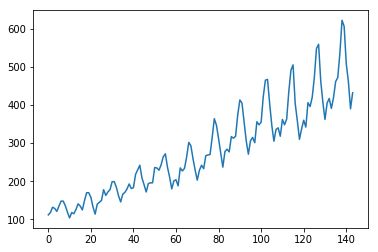

In [88]:
# use plot function with numpy array
mass = df_flights.passengers.values
plt.plot(mass)
plt.show()

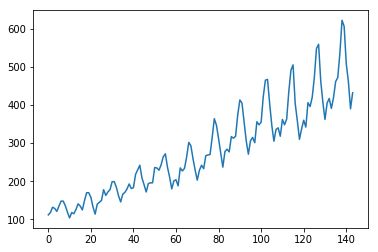

In [89]:
# use plot function with series
plt.plot(df_flights.passengers)
plt.show()

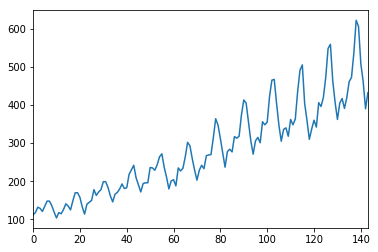

In [90]:
# plot methods in series
df_flights.passengers.plot()
plt.show()

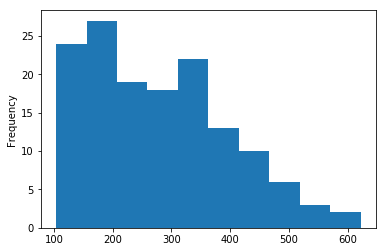

In [91]:
df_flights.passengers.plot('hist')
plt.show()

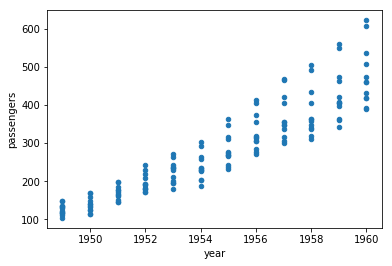

In [92]:
df_flights.plot(kind = 'scatter', x = 'year', y = 'passengers')
plt.show()

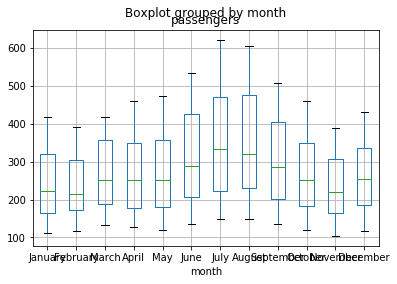

In [93]:
df_flights.boxplot(column='passengers', by='month')
plt.show()

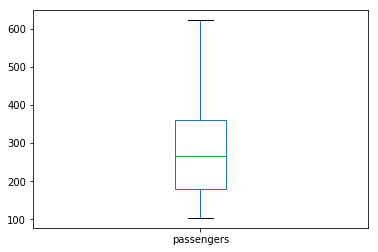

In [94]:
df_flights.plot(kind = 'box', y = 'passengers')
plt.show()

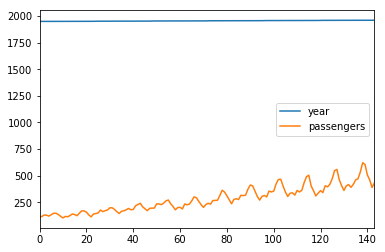

In [95]:
# plot methods in data frame would plot all the numeric columns on the same axis
df_flights.plot()
plt.show()

In [96]:
np.arange(len(df_flights)+1, step = 3)
#np.arange

array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
        39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
        78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 114,
       117, 120, 123, 126, 129, 132, 135, 138, 141, 144])

### Customization
#### Edit x axis and figure size

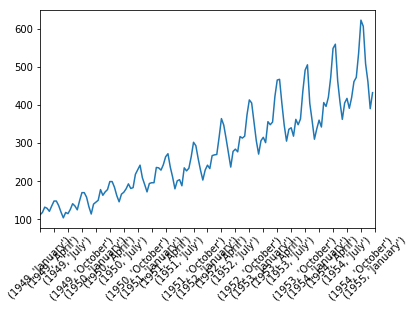

In [97]:
df_flights.index = df_flights[['year', 'month']]
df_flights.passengers.plot()
plt.xticks(np.arange(len(df_flights) + 1, step = 6), 
           df_flights.index[::3], 
           rotation=45)
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

#### zoom in

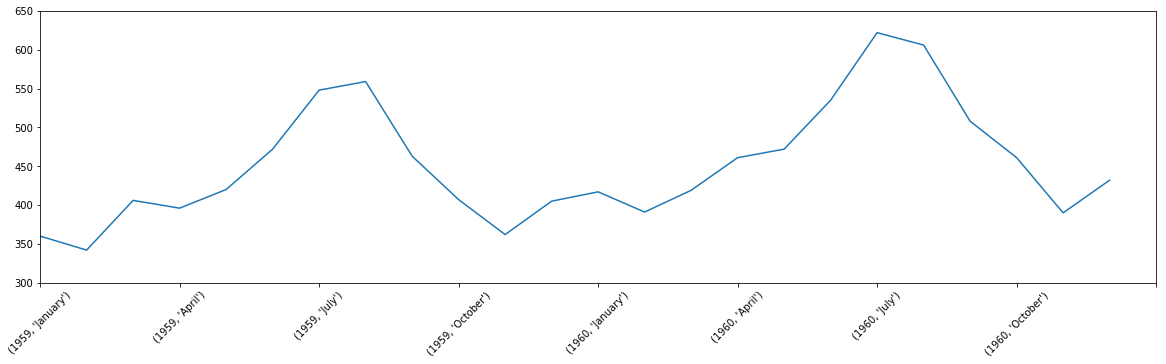

In [98]:
plt.clf()
df_flights.index = df_flights[['year', 'month']]
df_flights.passengers.plot()
plt.xticks(np.arange(len(df_flights)+1, step = 3), 
           df_flights.index[::3], 
           rotation=45)
plt.axis([120, 144, 300, 650])
plt.show()

In [99]:
df_flights.head()

,year,month,passengers
"(1949, January)",1949,January,112
"(1949, February)",1949,February,118
"(1949, March)",1949,March,132
"(1949, April)",1949,April,129
"(1949, May)",1949,May,121


#### subplot

In [100]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [101]:
plt.clf()

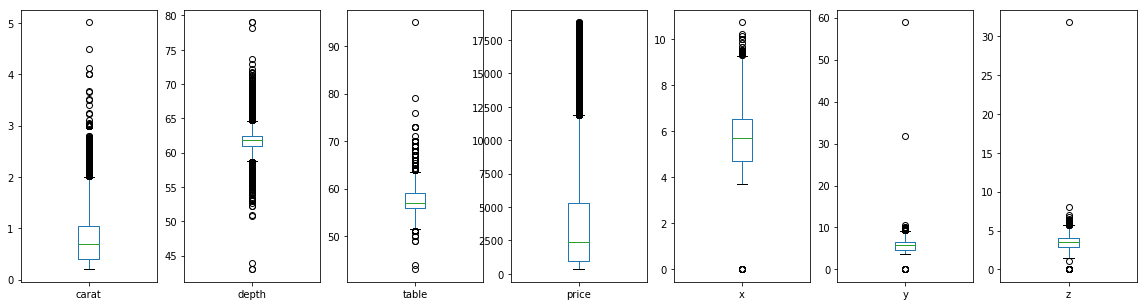

In [102]:
df_diamonds.plot(subplots=True, kind='box')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

### DataFrame Plot Idioms

Three different DataFrame plot idioms where syntax and results differ.
- x.plot(kind='hist')
- x.plt.hist()
- x.hist()

In [103]:
df_iris = sns.load_dataset('iris')
sepal_length = df_iris[['sepal_length']]

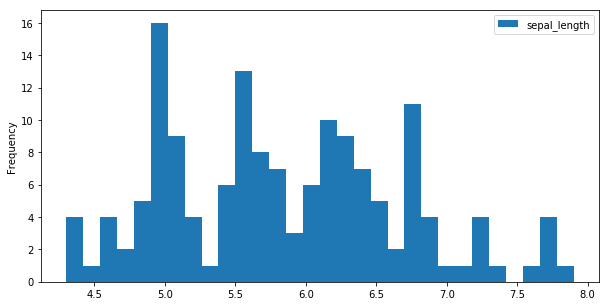

In [104]:
sepal_length.plot(kind='hist', bins=30)
plt.show()

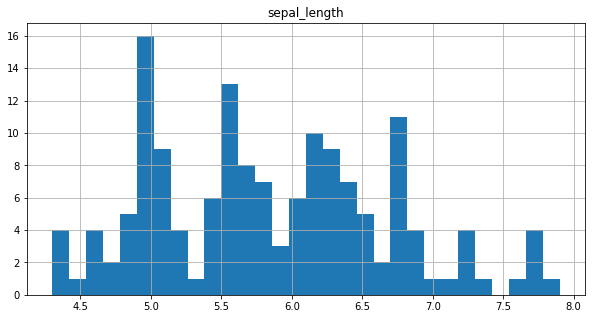

In [105]:
sepal_length.hist(bins=30)
plt.show()

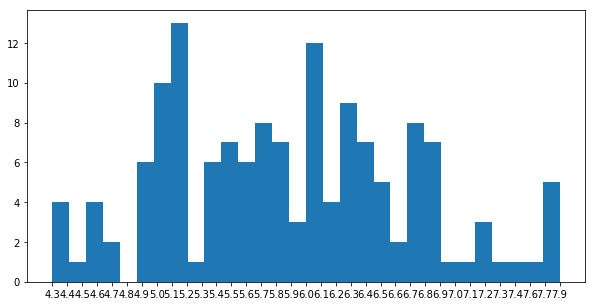

In [106]:
plt.hist(sepal_length, bins=30)
plt.show()

### PDF and CDF

In [107]:
df_tips = sns.load_dataset('tips')
df_tips['fraction'] = df_tips.tip/df_tips.total_bill
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


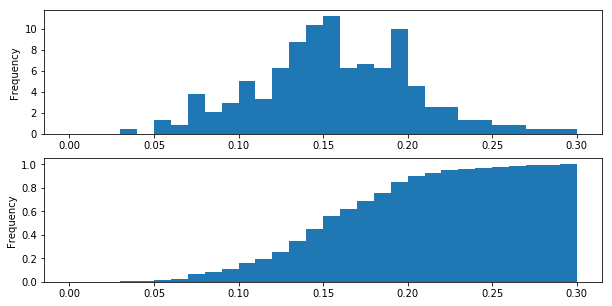

In [108]:
# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)

# Plot the PDF
df_tips.fraction.plot(ax=axes[0], kind='hist', bins=30, 
                      normed=True, range=(0,.3))

# Plot the CDF
df_tips.fraction.plot(ax=axes[1], kind='hist', bins=30, 
                      normed=True, cumulative=True, range=(0,.3))
plt.show()